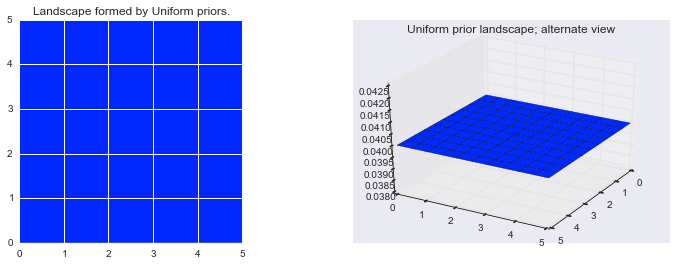

In [5]:
#MCMC = Markov Chain Monte Carlo

%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors.")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
plt.title("Uniform prior landscape; alternate view");

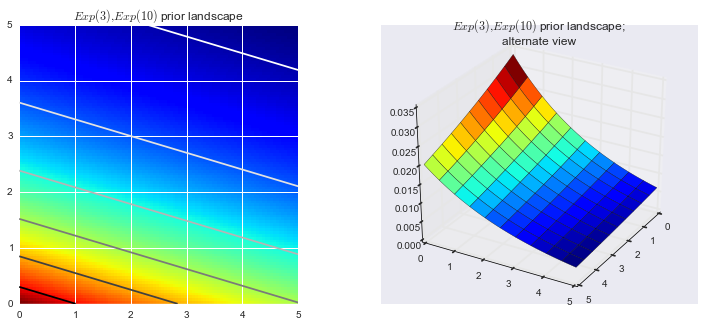

In [3]:
figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Exp(3), Exp(10)$ prior landscape")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)
plt.title("$Exp(3), Exp(10)$ prior landscape; \nalternate view")


In [2]:
#As the value of N increases the bullseye gets more and more concentrated
N = 5

lambda_1_true = 1
lambda_2_true = 3

data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)
print "observed (2-dimensional,sample size = %d):" % N, data

# plotting details.
x = y = np.linspace(.01, 5, 100)
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                        for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y)
                        for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

observed (2-dimensional,sample size = 5): [[1 4]
 [1 5]
 [1 2]
 [0 2]
 [0 2]]


(0, 5)

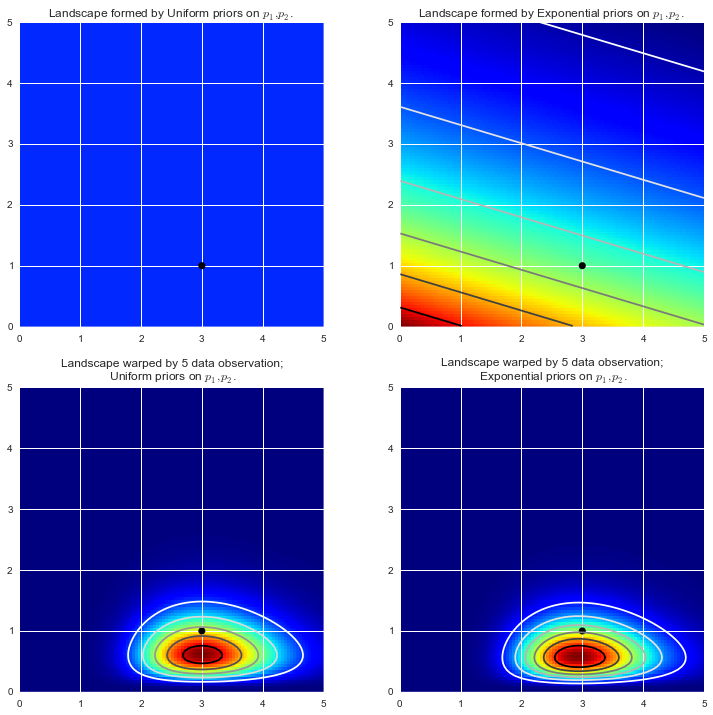

In [4]:
#Lets plot our different surfacs to help build intuition of the
#interaction between these prior/posterior distributions

figsize(12.5, 12)
# matplotlib heavy lifting below, beware!
plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors on $p_1, p_2$.")

plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.title("Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$." % N)
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(x, loc=0, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Exponential priors on $p_1, p_2$.")

plt.subplot(224)
# This is the likelihood times prior, that results in the posterior.
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))

plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.title("Landscape warped by %d data observation;\n Exponential priors on \
$p_1, p_2$." % N)
plt.xlim(0, 5)
plt.ylim(0, 5)


[ 115.85679142  152.26153716  178.87449059  162.93500815  107.02820697
  105.19141146  118.38288501  125.3769803   102.88054011  206.71326136] ...


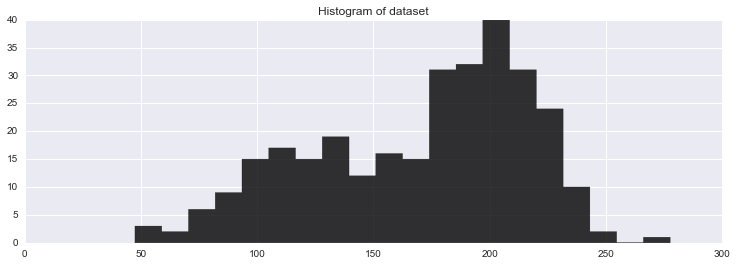

In [42]:
#Unsupervised Clustering using a Mixture Model

figsize(12.5,4)

data = np.loadtxt("data/mixture_data.csv", delimiter=',')

plt.hist(data, bins=20, color='k', histtype="stepfilled", alpha=0.8)
plt.title("Histogram of dataset")

plt.ylim([0,None])
print data[:10], '...'

In [43]:
#What does the above data look like?
#It could be said there are two peaks, that it is bimodal
#We can run some simulations to model how the data was generated

# 1.For each data point, choose cluster 1 with probability p, else choose cluster 2
# 2.Draw a random variate from a Normal distribution with parameters Mu and sigma for each cluster 
# 3.Repeat

#with the above algorithm, two datasets would cluster around the means of the proposed values 
#within a variance that would generate teh types of peaks we see in the image

import pymc as pm

#p will be the probability that a data point 
#is assigned to cluser one
#We assume it is uniform random
p = pm.Uniform("p", 0, 1)

assignment = pm.Categorical("assignment", [p, 1-p], size = data.shape[0])

print "prior assignment, with p= %.2f:" %p.value
print assignment.value[:10], '...'


prior assignment, with p= 0.66:
[0 0 1 0 1 0 1 0 1 0] ...


In [44]:
#Let's build our model
#We need some values for tau

#We do not know our standard deviation so we model them as well
#We model them as Uniform random variables between 0-100
taus = 1.0 / pm.Uniform("stds", 0, 100, size=2)**2
#The centers are eyeball factors we came up with visually from the data
centers = pm.Normal("centers", [120, 190], [0.01,0.01], size = 2)

"""
The deterministic functions below map assignments of 0 or 1 to
a set of parameters, located in the (1,2) arrays 'taus' and 'centers'
"""

@pm.deterministic
def center_i(assignment=assignment, centers=centers):
    return centers[assignment]

@pm.deterministic
def tau_i(assignment=assignment, taus=taus):
    return taus[assignment]

print "Random assignments: ", assignment.value[:5], '...'
print "Assigned center: ", center_i.value[:5], '...'
print "Assigned precision: ", tau_i.value[:5], '...'

Random assignments:  [0 0 1 0 1] ...
Assigned center:  [ 135.25399077  135.25399077  182.99725821  135.25399077  182.99725821] ...
Assigned precision:  [ 0.00131468  0.00131468  0.0003263   0.00131468  0.0003263 ] ...


In [45]:
#Now we need some observations for posterior probabilities
observations = pm.Normal("obs", center_i, tau_i, value=data, observed=True)

#Lets create a model so we can generate lots and lots of samples

model = pm.Model([p, assignment, observations, taus, centers])

In [46]:
mcmc = pm.MCMC(model)
mcmc.sample(50000)

 [-----------------100%-----------------] 50000 of 50000 complete in 23.3 sec

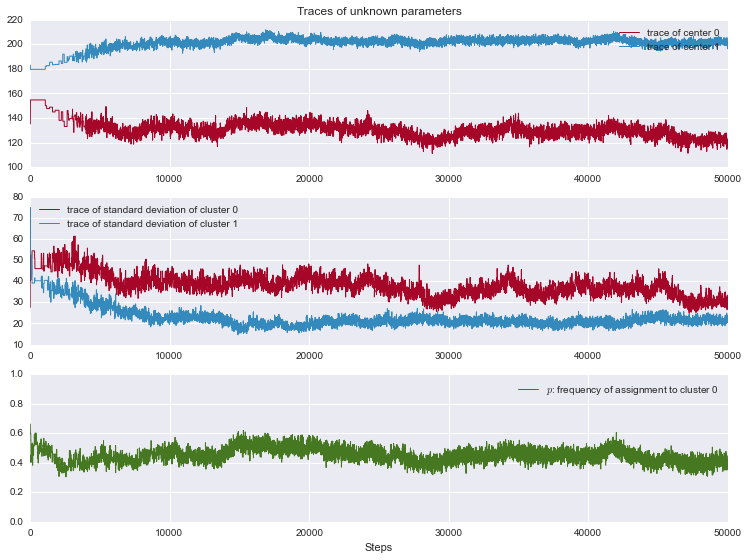

In [47]:
#The plots below are the traces or unknown parameters of the center, 
#precision, and probability of assignment to cluster

figsize(12.5, 9)
plt.subplot(311)
lw=1
center_trace = mcmc.trace("centers")[:]

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] \
if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]

plt.plot(center_trace[:, 0], label="trace of center 0", c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label="trace of center 1", c=colors[1], lw=lw)
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)



plt.subplot(312)
std_trace = mcmc.trace("stds")[:]
plt.plot(std_trace[:, 0], label="trace of standard deviation of cluster 0",
     c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label="trace of standard deviation of cluster 1",
     c=colors[1], lw=lw)
plt.legend(loc="upper left")

plt.subplot(313)
p_trace = mcmc.trace("p")[:]
plt.plot(p_trace, label="$p$: frequency of assignment to cluster 0",
     color="#467821", lw=lw)
plt.xlabel("Steps")
plt.ylim(0, 1)
plt.legend()

In [48]:
mcmc.sample(100000)

 [-----------------100%-----------------] 100000 of 100000 complete in 43.7 sec

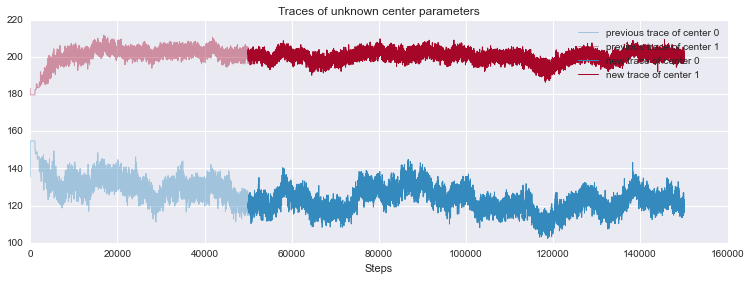

In [53]:
figsize(12.5, 4)
center_trace = mcmc.trace("centers", chain=1)[:]
prev_center_trace = mcmc.trace("centers", chain=0)[:]

x = np.arange(50000)
plt.plot(x, prev_center_trace[:, 0], label="previous trace of center 0",
     lw=lw, alpha=0.4, c=colors[1])
plt.plot(x, prev_center_trace[:, 1], label="previous trace of center 1",
     lw=lw, alpha=0.4, c=colors[0])

x = np.arange(50000, 150000)
plt.plot(x, center_trace[:, 0], label="new trace of center 0", lw=lw, c="#348ABD")
plt.plot(x, center_trace[:, 1], label="new trace of center 1", lw=lw, c="#A60628")

plt.title("Traces of unknown center parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.8)
plt.xlabel("Steps")

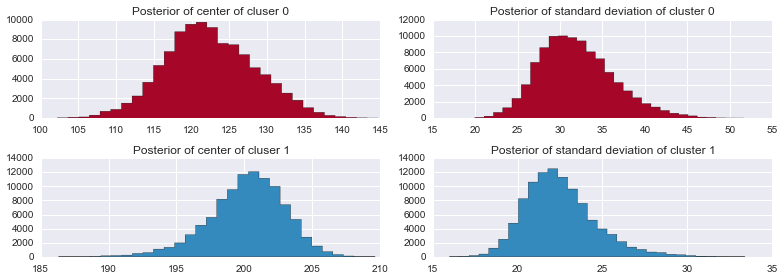

In [54]:
#We still need to perform a cluster investigation
#To identify the center of the clusters we'll plot the 
#the posterior distribution mean and std

figsize(11.0, 4)
std_trace = mcmc.trace("stds")[:]

_i = [1,2,3,4]

for i in range(2):
    #plt.subplot(2,2,_i[2*i])
    plt.subplot(2, 2, _i[2 * i])
    plt.title("Posterior of center of cluser %d" %i)
    plt.hist(center_trace[:, i], color=colors[i], bins=30,
            histtype="stepfilled")
    
    plt.subplot(2,2, _i[2*i+1])
    plt.title("Posterior of standard deviation of cluster %d"% i)
    plt.hist(std_trace[:,i], color=colors[i], bins=30,
            histtype="stepfilled")
    

    plt.tight_layout()

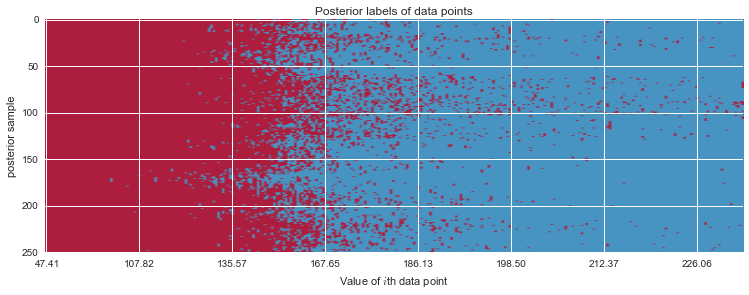

In [55]:
#The plots above are the most likely centers that our algorithm proposes

import matplotlib as mpl

figsize(12.5, 4.5)
plt.cmap = mpl.colors.ListedColormap(colors)
plt.imshow(mcmc.trace("assignment")[::400, np.argsort(data)],
          cmap = plt.cmap, aspect=.4, alpha=.9)
plt.xticks(np.arange(0, data.shape[0], 40),
          ["%.2f" % s for s in np.sort(data)[::40]])

plt.ylabel("posterior sample")
plt.xlabel("Value of $i$th data point")
plt.title("Posterior labels of data points")



In [30]:
#From the plot above we can see that the most uncertainty exists
#between ~145 - ~170



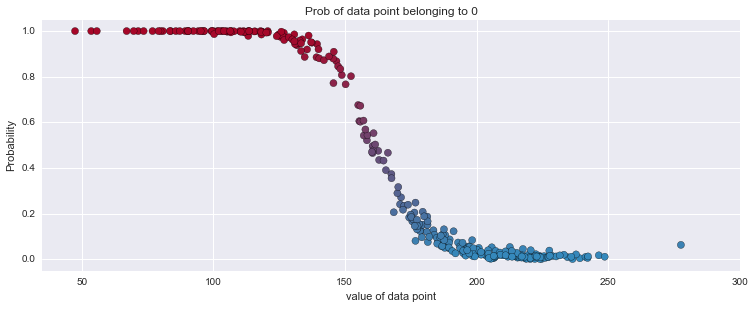

In [56]:
#What about estimating the frequency of each data point belonging to 0 or 1

cmap =mpl.colors.LinearSegmentedColormap.from_list("BMH", colors)
assign_trace = mcmc.trace("assignment")[:]
plt.scatter(data, 1 - assign_trace.mean(axis=0), cmap=cmap,
           c= assign_trace.mean(axis=0), s=50)
plt.ylim(-.05, 1.05)
plt.xlim(35, 300)
plt.title("Prob of data point belonging to 0")
plt.ylabel("Probability")
plt.xlabel("value of data point")


In [33]:
#The above graph is helpful to see the distinction and cutoff points

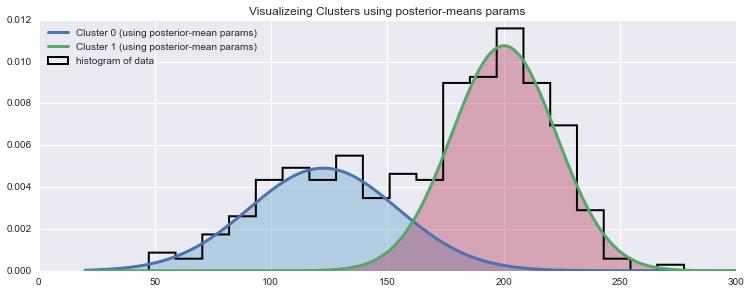

In [57]:
#Is there a way to choose a single pair of values for mean and std that gives 
#us best of fit?
#Right now we have two normal distributions that bit the data. Can we do better

#we can use the mean of the posterior distributions

norm = stats.norm
x = np.linspace(20,300,500)
posterior_center_means = center_trace.mean(axis=0)
posterior_std_means = std_trace.mean(axis=0)
posterior_p_mean = mcmc.trace("p")[:].mean()


plt.hist(data, bins=20, histtype="step", normed=True, color='k',
        lw=2, label="histogram of data")

y = posterior_p_mean * norm.pdf(x, loc=posterior_center_means[0],
                               scale=posterior_std_means[0])
plt.plot(x,y, label="Cluster 0 (using posterior-mean params)", lw=3)
plt.fill_between(x,y, color=colors[1], alpha=0.3)

y = (1 - posterior_p_mean) * norm.pdf(x, loc=posterior_center_means[1],
                                     scale = posterior_std_means[1])

plt.plot(x, y, label="Cluster 1 (using posterior-mean params)", lw=3)
plt.fill_between(x,y, color=colors[0], alpha=0.3)

plt.legend(loc="upper left")
plt.title("Visualizeing Clusters using posterior-means params")

In [36]:
#in the above plot we can see that the two clusters are related
#in fact the means and stds of both clusters will be directly related to one another
#The mean of cluster zero will pull on the mean on cluster 1 and vice versa
#also the std of each will be related in a similar manner

 [-----------------100%-----------------] 500 of 500 complete in 0.0 sec

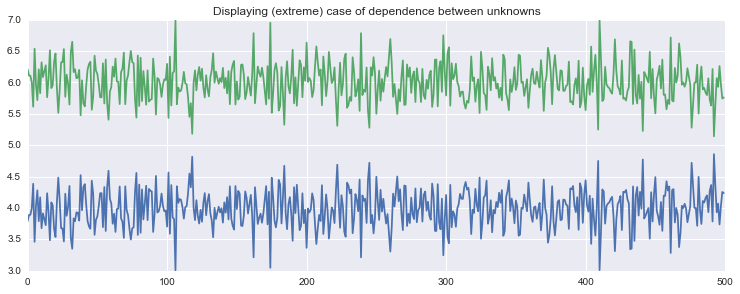

In [58]:
#Lets model the relationship between variables
import pymc as pm

#two variables x and y are related such that x + y = 10
#We model x as normal random variable with mean of 4

x = pm.Normal("x", 4, 10)
y = pm.Lambda("y", lambda x=x:10 - x, trace=True)

example_mcmc = pm.MCMC(pm.Model([x,y]))
example_mcmc.sample(500)

plt.plot(example_mcmc.trace('x')[:])
plt.plot(example_mcmc.trace('y')[:])
plt.title("Displaying (extreme) case of dependence between unknowns")


In [ ]:
#Given the relationship between x and y, we need to be sure to only
#talk about relationships between the ith, jth variables together
#comparing i and j has no meaning since they are not related. 

In [59]:
#Cluster Prediction

#The above process can be generalized for k clusters
#Our example was used for k=2 clusters

#If we are given a new data point, can we predict its cluster

norm_pdf = stats.norm.pdf
p_trace = mcmc.trace("p")[:]
x = 175

v = p_trace * norm_pdf(x, loc=center_trace[:, 0], scale=std_trace[:, 0]) > \
    (1 - p_trace) * norm_pdf(x, loc=center_trace[:, 1], scale=std_trace[:, 1])

print "Probability of belonging to cluster 1:", v.mean()



Probability of belonging to cluster 1: 0.0038


In [60]:
#Given our posterior distribution the probability that x is in Cluster 1 is close to zero

In [ ]:
#Maximum a posterior

#Our convergence values are a function of starting values of the MCMC algorithm
#We have to run many many iterations for the algo to "forget" 
#its initial position and converge to a more meaningful distribution

#Ideally we start out algorithm from the "peak" of where the posterior distribution exists
#We do not know where our peak is 
#PyMC has an object that will allow us to approximate MAP

# map_ = pm.MAP( model )
# map_.fit()

#By running this .fit() we can reduce the burn-in period

#In PyMC we can discard the first n samples as the burn-in param when we call sample

# model = pm.Model([p, assignment, taus, centers])

# map_ = pm.MAP( model )
# map_.fit()

# mcmc = pm.MCMC( model )
# mcmc.sample(100000, 50000) #50000 burn will discard the first 50000

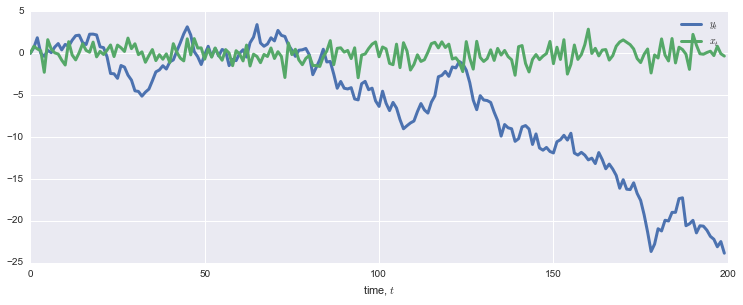

In [60]:
#Autocorrelation

#figsize(12.5, 4)

import pymc as pm

x_t = pm.rnormal(0,1,200)

x_t[0] = 0
y_t = np.zeros(200)

for i in range(1,200):
    y_t[i] = pm.rnormal(y_t[i - 1], 1)
    
plt.plot(y_t, label="$y_t$", lw=3)
plt.plot(x_t, label="$x_t$", lw=3)
plt.xlabel("time, $t$")
plt.legend()

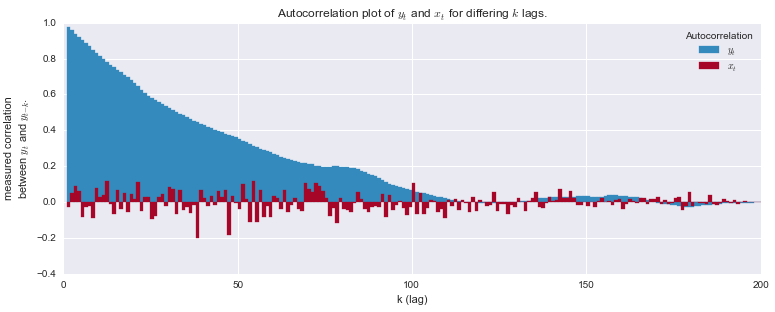

In [61]:
#One helpful way to think about autocorrelation is to ask:
#If I know the value/position at time S, will it help me to
#answer the question, what is the value at time t

#With our time series above we've designed the data set to be 
#autocorrelated, so if we know y_0 w can make an estimate as to what y_1 is

def autocorr(x):
    # from http://tinyurl.com/afz57c4
    result = np.correlate(x, x, mode='full')
    result = result / np.max(result)
    return result[result.size / 2:]

colors = ["#348ABD", "#A60628", "#7A68A6"]

x = np.arange(1, 200)
plt.bar(x, autocorr(y_t)[1:], width=1, label="$y_t$",
        edgecolor=colors[0], color=colors[0])
plt.bar(x, autocorr(x_t)[1:], width=1, label="$x_t$",
        color=colors[1], edgecolor=colors[1])

plt.legend(title="Autocorrelation")
plt.ylabel("measured correlation \nbetween $y_t$ and $y_{t-k}$.")
plt.xlabel("k (lag)")
plt.title("Autocorrelation plot of $y_t$ and $x_t$ for differing $k$ lags.")

#As time k increases, the autocorrelation of y_t decreases

In [36]:
#With MCMC we will have high degree of autocorrelation
#The algorithm will search for values near it so and it will
#move through the values slowly in a methodical, correlated manner

#If we observe a chain with low autocorrelation, it is sufficient to
#conclude that convergence has occurred. 

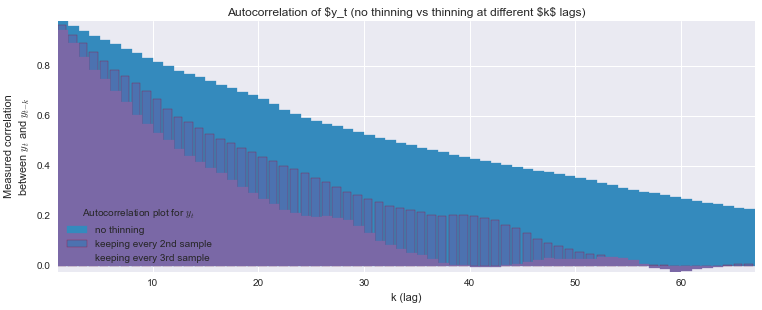

In [62]:
#When you are resampling you often need values that are independent
#by definition autocorrelation is dependent
#However, we can take the nth value to preserve independence 
#and reduce the affect of autocorrelation
max_x = 200 / 3 + 1
x = np.arange(1, max_x)

plt.bar(x, autocorr(y_t)[1:max_x], edgecolor=colors[0],
       label="no thinning", color=colors[0], width=1)

plt.bar(x, autocorr(y_t[::2])[1:max_x], edgecolor=colors[1],
       label="keeping every 2nd sample")

plt.bar(x, autocorr(y_t[::3])[1:max_x], width=1, edgecolor=colors[2],
        label="keeping every 3rd sample", color=colors[2])

plt.autoscale(tight=True)
plt.legend(title="Autocorrelation plot for $y_t$", loc="lower left")
plt.ylabel("Measured correlation \nbetween $y_t$ and $y_{t-k}$")
plt.xlabel("k (lag)")
plt.title("Autocorrelation of $y_t (no thinning vs thinning at different $k$ lags)")

 [-----------------100%-----------------] 25000 of 25000 complete in 9.8 secPlotting centers_0
Plotting centers_1


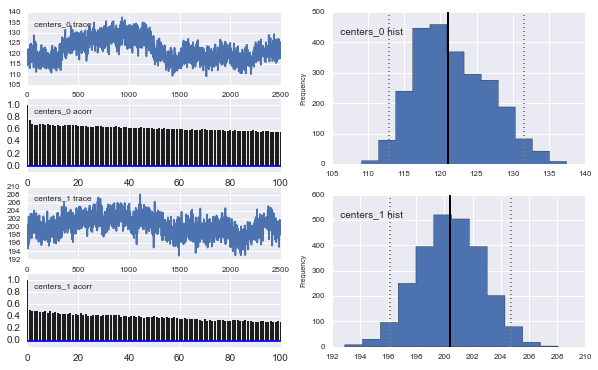

In [64]:
#As we see above, as we thin, the autocorrelation drops
#But we must have sufficient sample size so that requires us to run more samples

#10,000 samples unthinned is 100000 samples thinned at 10
import pymc as pm
from pymc.Matplot import plot as mcplot

#sample size of 25000, with thinning every 10
#from pymc.Matplot import plot as mcplot

mcmc.sample(25000, 0, 10)
mcplot(mcmc.trace("centers", 2), common_scale=False)


